In [4]:
import yfinance as yf

In [5]:
"""
period : str
    Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
interval : str (Intraday data cannot extend last 60 days)
    Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
start: str(YYYY-MM-DD) or _datetime
end: str (YYYY-MM-DD) or _datetime
"""

my_tickers = {'ATVI': 'Activision',
              'ADS': 'Adidas',
              'GOOG': 'Alphabet',
              'MSFT': 'Microsoft',
              'AMZN': 'Amazon.com',
              'TEF': 'Telefonica'
          }

# Select requested tickers
tickers = yf.Tickers(" ".join(my_tickers.keys()))

# Obtain dataframe for all tickers
hist = tickers.history(period="6mo", interval="1d", start=None, end=None, actions=False, rounding=True) 

[*********************100%***********************]  6 of 6 completed


,Close,High,Low,Open,Volume,Change,Change_Percent,Change_Label
Date,,,,,,,,
2019-09-26,1739.84,1763.37,1731.50,1762.79,3536800.0,NaN,NaN,-1.0
2019-09-27,1725.45,1749.12,1713.82,1748.00,3907200.0,-14.39,-0.827088,-1.0
2019-09-30,1735.91,1737.46,1709.22,1726.99,2644700.0,10.46,0.606219,1.0
2019-10-01,1735.65,1755.60,1728.41,1746.00,3084500.0,-0.26,-0.014978,-1.0
2019-10-02,1713.23,1728.89,1705.00,1727.74,3301100.0,-22.42,-1.291735,-1.0
...,...,...,...,...,...,...,...,...
2020-03-20,1846.09,1957.00,1820.73,1926.31,9817900.0,-34.84,-1.852275,-1.0
2020-03-23,1902.83,1919.40,1812.00,1827.75,7808500.0,56.74,3.073523,1.0
2020-03-24,1940.10,1955.00,1900.34,1951.50,7147100.0,37.27,1.958662,1.0


Change Mean: 1.5172800000000006
Change Sum: 189.66000000000008
Change Percent Mean: 0.10441254433567133
Change Label: 0.015873015873015872


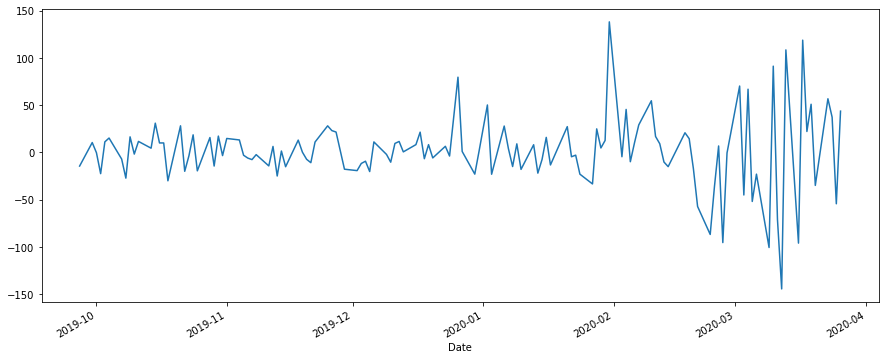

In [7]:
def set_change_label(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

# Add important data columns
for ticker in my_tickers.keys():
    hist['Change', ticker] = hist['Close', ticker].diff()
    hist['Change_Percent', ticker] = hist['Close', ticker].div(hist['Close', ticker].shift(1))*100-100
    hist['Change_Label', ticker] = hist['Change', ticker].apply(set_change_label)
    
#Select Stock
stock_label = 'AMZN'
hist_one = hist.iloc[:, hist.columns.get_level_values(1)==stock_label]
#Delete level 1 column labels
hist_one = hist_one.T.reset_index(level=1, drop=True).T

display(hist_one)

display(hist_one['Change'].plot(figsize=(15,6)))

print("Change Mean:", hist_one['Change'].mean())
print("Change Sum:", hist_one['Change'].sum())
print("Change Percent Mean:", hist_one['Change_Percent'].mean())
print("Change Label:", hist_one['Change_Label'].mean())